<div style="border-radius: 15px; border: 3px solid navy; padding: 15px; ">
<b> Привет, Илья! Меня зовут Денис Иванов. </b> 
<br> Сегодня я буду проверять твой проект. Попробую помочь тебе сделать его еще лучше!
<br> Если не против, то дальнейшее общение будет проходить на «ты». Если это неприемлемо, то обязательно напиши мне в комментариях — мы перейдем на «вы».
<br> Также сразу хочу обратить внимание на цветовую разметку.
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Так обозначены отличные решения и идеи, которые можно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Так обозначено то, что можно сделать лучше или оптимизировать.
</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
❌ Так  обозначено то, что требует исправления. Работа не может быть принята с красными комментариями.
</div>
    
<br> Пожалуйста, не перемещай, не изменяй и не удаляй мои коментарии, так как они повышают качество повторного ревью.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
    
<br> Также будет очень хорошо, если ты будешь помечать свои действия следующим образом.
    
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:</b> ...
</div>
    
<hr style="border-width: 3px;">
    
<b>Полезные ссылки:</b>

* Если тебя заинтересовал процесс создания и применения нейронных сетей, то могу предложить обратить внимание на следующие курсы: 
    - <a href='https://stepik.org/course/401/info'>Нейронные сети</a> — математика и  алгоритмы, лежащие в основе обучения нейронных сетей,
    - <a href='https://dls.samcs.ru'>DLS</a> — теория и практика глубокого обучения и нейронных сетей на PyTorch.
* Если удобнее читать, то вот довольно познавательная книга <a href='https://vk.com/wall-203365865_1152'>«PyTorch. Освещая глубокое обучение»</a>.
    
<hr style="border-width: 3px;">
    
<b>Общее впечатление</b>
* Большое спасибо за проделанную работу.
* Радует, что проект хорошо структурирован.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Проект принят.
</div>

# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
import os.path
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Dense, GlobalMaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_error # < Перенесите сюда исследовательский анализ данных >

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Обрати внимание на импорты. Если какой-то модуль/библиотеку ты не используешь в дальнейшем, то из импорта ее стоит убрать.
</div>

In [2]:
df = pd.read_csv('/datasets/faces/labels.csv') # загружаем файл с метриками

foto_faces = '/datasets/faces/final_files' # директория с картинками

In [3]:
df.sample(5)

,file_name,real_age
1115,001115.jpg,14
6912,006923.jpg,49
1706,001706.jpg,25
422,000422.jpg,25
3532,003532.jpg,77


In [4]:
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
df.shape

(7591, 2)

In [6]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Молодец, что не забываешь о методах первичного анализа данных. Знание статистик данных позволяет работать с ними более продуктивно.
</div>

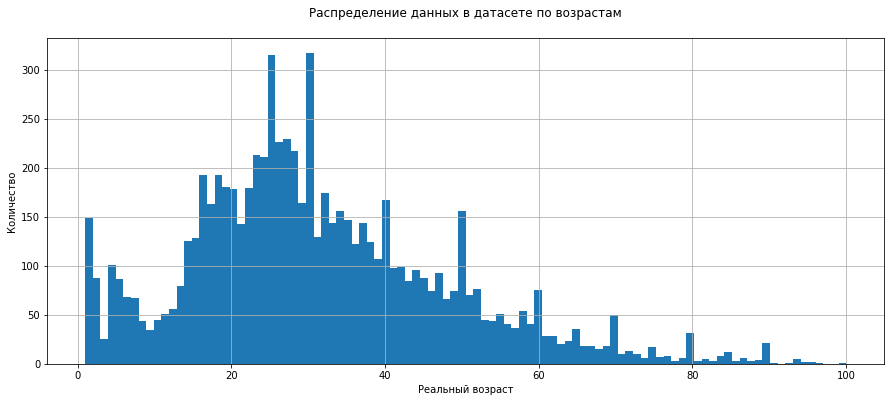

In [7]:
plt.figure(figsize=(15,6))
plt.title('Распределение данных в датасете по возрастам\n')
plt.xlabel('Реальный возраст')
plt.ylabel('Количество')
df.real_age.hist(bins=100);

In [8]:
df['age_cat'] = pd.cut(
    df.real_age,
    bins=[0, 11, 16, 20, 35, 59, 74, 89, 100],
    labels=['дети до 11 лет', 'подростки 12-15 лет', 'юноши 16-20 лет',
            'молодёж 21-35 лет', 'зрелый возраст 35-59 лет',
            'пожилые 60-74 года', 'старики 75-89 лет',
            'долгожители от 90 лет']
)

Видим повторяющиеся пики значений 90, 80, 70, 60, 50, 40 и 2 пика в районе 30 лет. Скорее всего, не знали реальный возраст и разметили приблизительно. При этом средний возраст 31 год, а медианный - 29 лет. Большое количество фотографий с отметкой в 1 год. Так же в распределении значений мало данных 60+.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Верно, можно заметить, что аномалии присутствуют в годах кратных 5, т.о. имеет смысл предположение, что разметка изображений проводилась руками и возраст определялся не точно.
</div>

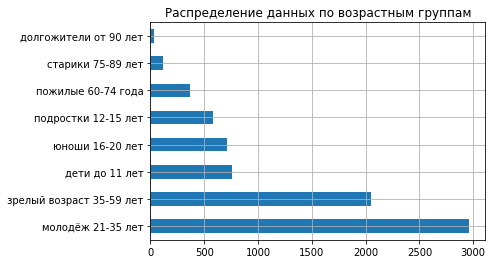

In [9]:
df.age_cat.value_counts().plot(
    kind='barh', grid=True,
    title='Распределение данных по возрастным группам'
);

Из распределения видим что наибольшее число данных приходится на молодых и зрелых людей от 20 до 59 лет. Дальше идут дети юноши и подростки, и меньшее количество фотографий людей старше 60.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

⚠️ Радует, что оставляешь промежуточные выводы. Подумай, как текущее распределение возраста может сказаться на качестве обучения?   
</div>   

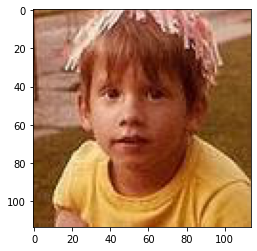

In [10]:
plt.imshow(Image.open('/datasets/faces/final_files/000000.jpg')) # выведем одну фотографию

In [11]:
rows = 3
columns = 4 # зададим число строк и колонок

images = df.sample(rows*columns, random_state=78945) # зададим выборку произвольных данных

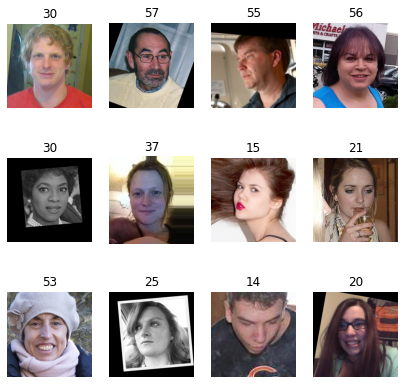

In [13]:
fig = plt.figure(figsize=(7, 7))  # выведем изображения и данные возраста
for i in range(columns*rows):
    img = Image.open(os.path.join(foto_faces, images.iloc[i]['file_name']))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(images.iloc[i]['real_age'])
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
❌ Для полноты исследования, давай сформулируем вывод. Стоит описать:
   - Анализ и выводы по размерам выборки.
   - Анализ и выводы по распределению целевого признака (возраст).
   - Анализ и выводы по устройству датасета.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:
    В нашем распоряжении датасет с размеченными фотографиями в количестве 7591 шт и размером 244х244, этого количества фотографий вполнехватит для обучения модели. Исходя из построенной гистограммы мы видим повторяющиеся пики значений 90, 80, 70, 60, 50, 40 и 2 пика в районе 30 лет. Скорее всего, не знали реальный возраст и разметили приблизительно. При этом средний возраст 31 год, а медианный - 29 лет. Большое количество фотографий с отметкой в 1 год. Так же в распределении значений мало данных 60+. Из распределения видим что наибольшее число данных приходится на молодых и зрелых людей от 20 до 59 лет. Можно сделать вывод что модель будет давать более точные прогнозы на фотографиях из основной группы от 20 до 59 лет, пожилых людей модель будет определять хуже. Таже данных от 12 до 20 лет не много тут мы не сможем решать основную задачу контроль кассиров при продаже алкоголя. Так-же в данных имеются обрезанные или повёрнутые фотографии, это тоже может повлиять на результат обучения модели.
    </b> ...
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Отлично. Верные наблюдения. Действительно, малое количество данных для определенной категории (в данном случае для пожилых людей) может привести к смещению модели в сторону более представленных категорий (20-40 лет). Кроме того, модель может обучиться на основе характеристик данных категорий, которые не будут работать для других возрастов, что также может привести к низкому качеству предсказаний.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True, rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])


    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Архитектура сети и функция обучения определены верно.
</div>

```

# < скопируйте результат вывода на экран сюда >
Train for 356 steps, validate for 119 steps
Epoch 1/10
2023-09-05 16:34:19.192621: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-09-05 16:34:19.674636: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 242s - loss: 201.4268 - mae: 10.3771 - val_loss: 578.5706 - val_mae: 18.9460
Epoch 2/10
356/356 - 50s - loss: 86.4141 - mae: 7.0715 - val_loss: 204.4821 - val_mae: 11.0077
Epoch 3/10
356/356 - 46s - loss: 55.2457 - mae: 5.6928 - val_loss: 91.5095 - val_mae: 7.1293
Epoch 4/10
356/356 - 49s - loss: 42.0693 - mae: 4.9879 - val_loss: 70.0592 - val_mae: 6.2597
Epoch 5/10
356/356 - 54s - loss: 31.5272 - mae: 4.2755 - val_loss: 104.2951 - val_mae: 8.0801
Epoch 6/10
356/356 - 51s - loss: 25.6146 - mae: 3.8530 - val_loss: 70.2568 - val_mae: 6.3941
Epoch 7/10
356/356 - 44s - loss: 21.0417 - mae: 3.4643 - val_loss: 72.5533 - val_mae: 6.3873
Epoch 8/10
356/356 - 51s - loss: 16.7689 - mae: 3.1071 - val_loss: 67.6592 - val_mae: 6.0136
Epoch 9/10
356/356 - 54s - loss: 14.8338 - mae: 2.9390 - val_loss: 90.0906 - val_mae: 7.0521
Epoch 10/10
356/356 - 44s - loss: 13.2752 - mae: 2.7848 - val_loss: 67.2475 - val_mae: 6.1101
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 67.2475 - mae: 6.1101
Test MAE: 6.1101
# < длинные строки со скачиванием модели можно удалить >

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Цель достигнута. В статье о датасете, с которым мы работаем, значение MAE равно 5.4, поэтому тобой получены достаточно хорошие результаты.
</div>

## Анализ обученной модели

Для анализа возраста людей по фотографии была использована CCN ResNet50. Было задано 10 эпох и функция оптимизации для нахождения минимума Adam с шагом lr=0.0001. По итогам анализа мы получили значение метрики mean absolute error для обучающей и для валидационной выборки. Значение mae для обучающей получилось 2.7848, а для валидационной mae получилось 6.1101. Модель обучена и неплохо предсказывает!

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Спасибо за работу, у тебя получился хороший проект, который я приму, как исправишь замечания.
    
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Отличная работа над ошибками. Проект принят. Удачи в дальнейшей учебе!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы